In [16]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [7]:
def load_data(day, time):
    # load data
    A_traffics = np.load(f"processed_data/test/A_traffics_{day}_{time}_test.npy")
    print(A_traffics.shape)
    print(f"Loading accident and congestion data for {day}, {time}")
    accident_df = pd.read_csv(
        f"processed_data/test/{day}_{time}_accidents_test.csv"
    ).drop('date', axis=1)
    congestion_df = pd.read_csv(
        f"processed_data/test/{day}_{time}_congestion_test.csv"
    ).drop('date', axis=1)

    # process data
    print(f"Processing data")
    # process accidents
    accident_np = accident_df.to_numpy()
    accident_counts = accident_np.sum(axis=1)
    P = accident_np / accident_counts[:, np.newaxis]

    # process accidents
    accident_np = accident_df.to_numpy()
    accident_counts = accident_np.sum(axis=1)
    P = accident_np / accident_counts[:, np.newaxis]

    return P, A_traffics, congestion_df, accident_df

In [13]:
P, A_traffics, congestion_df, accident_df = load_data("wd", "night")

(120, 189, 300)
Loading accident and congestion data for wd, night
Processing data


In [9]:
with open('results/model_1_raw.pickle', 'rb') as f:
    results = pickle.load(f)

In [11]:
def evaluate_on_test(A_test, P_test, X_opt, y_opt):
    scenario_times = []
    for i in range(len(A_test)):
        # Same objective expression as training
        T_i = ((A_test[i] * X_opt) @ P_test[i, :]).sum()
        scenario_times.append(T_i)
        
    return np.mean(scenario_times)


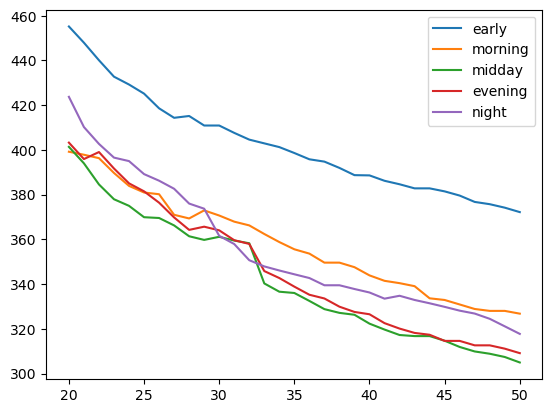

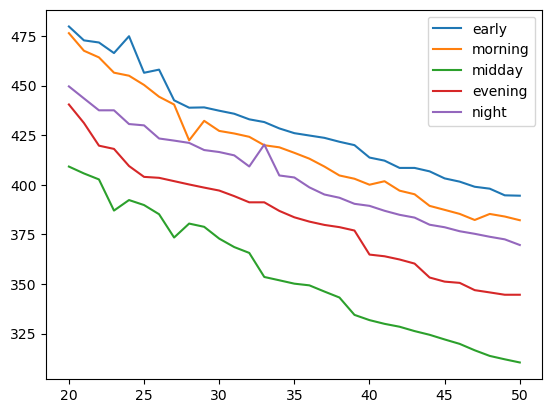

In [19]:
avg_times = {}

for day in ["wd", "we"]:
    avg_times[day] = {}
    for time in ["early", "morning", "midday", "evening", "night"]:
        avg_times[day][time] = []
        for num_depot in range(20, 50+1):
            result = results[day][time][num_depot]
            X_opt = result['X']
            y_opt = result['y']
            avg_times[day][time].append(evaluate_on_test(A_traffics, P, X_opt, y_opt))
        plt.plot(np.arange(20, 51), avg_times[day][time], label=f"{time}")
    plt.legend()
    plt.show()